In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from tensorflow.keras import backend
backend.set_image_data_format('channels_first')

In [3]:
def get_unet():
    #concat_axis = 3 # 3 o 1
    concat_axis = 1 
    #inputs = layers.Input(shape = (80, 120, 3))
    inputs = layers.Input(shape = (3, 128, 144))
    
    #encoder
    bn0 = BatchNormalization(axis=1)(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(bn0)
    bn1 = BatchNormalization(axis=1)(conv1)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn1)
    bn2 = BatchNormalization(axis=1)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn3 = BatchNormalization(axis=1)(conv2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn3)
    bn4 = BatchNormalization(axis=1)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn5 = BatchNormalization(axis=1)(conv3)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn5)
    bn6 = BatchNormalization(axis=1)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn6)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    bn7 = BatchNormalization(axis=1)(conv4)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn7)
    bn8 = BatchNormalization(axis=1)(conv4)
    #pool4 = layers.MaxPooling2D(pool_size=(2, 3))(bn8)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn8)
    
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    bn9 = BatchNormalization(axis=1)(conv5)
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(bn9)
    bn10 = BatchNormalization(axis=1)(conv5)

    ##decoder
    #up_conv5 = layers.UpSampling2D(size=(2, 3))(bn10)
    up_conv5 = layers.UpSampling2D(size=(2, 2))(bn10)
    up6 = layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    bn11 = BatchNormalization(axis=1)(conv6)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn11)
    bn12 = BatchNormalization(axis=1)(conv6)

    up_conv6 = layers.UpSampling2D(size=(2, 2))(bn12)
    up7 = layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    bn13 = BatchNormalization(axis=1)(conv7)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn13)
    bn14 = BatchNormalization(axis=1)(conv7)

    up_conv7 = layers.UpSampling2D(size=(2, 2))(bn14)
    up8 = layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    bn15 = BatchNormalization(axis=1)(conv8)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn15)
    bn16 = BatchNormalization(axis=1)(conv8)

    up_conv8 = layers.UpSampling2D(size=(2, 2))(bn16)
    up9 = layers.concatenate([up_conv8, conv1], axis=concat_axis)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    bn17 = BatchNormalization(axis=1)(conv9)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn17)
    bn18 = BatchNormalization(axis=1)(conv9)

    conv10 = layers.Conv2D(1, (1, 1))(bn18)
    #bn19 = BatchNormalization(axis=1)(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mae', optimizer=sgd, metrics=['mse','acc'])
    #model.compile(loss='mae', optimizer=Adam(lr=0.01), metrics=['mse'])
    print(model.summary())

    return model

In [2]:
# Channel last
def get_unet():
    concat_axis = 3 # 3 o 1
#    concat_axis = 1 
    #inputs = layers.Input(shape = (80, 120, 3))
    inputs = layers.Input(shape = (128, 144, 3))
    
    #encoder
    bn0 = BatchNormalization(axis=3)(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(bn0)
    bn1 = BatchNormalization(axis=3)(conv1)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn1)
    bn2 = BatchNormalization(axis=3)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn3 = BatchNormalization(axis=3)(conv2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn3)
    bn4 = BatchNormalization(axis=3)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn5 = BatchNormalization(axis=3)(conv3)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn5)
    bn6 = BatchNormalization(axis=3)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn6)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    bn7 = BatchNormalization(axis=3)(conv4)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn7)
    bn8 = BatchNormalization(axis=3)(conv4)
    #pool4 = layers.MaxPooling2D(pool_size=(2, 3))(bn8)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn8)
    
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    bn9 = BatchNormalization(axis=3)(conv5)
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(bn9)
    bn10 = BatchNormalization(axis=3)(conv5)

    ##decoder
    #up_conv5 = layers.UpSampling2D(size=(2, 3))(bn10)
    up_conv5 = layers.UpSampling2D(size=(2, 2))(bn10)
    up6 = layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    bn11 = BatchNormalization(axis=3)(conv6)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn11)
    bn12 = BatchNormalization(axis=3)(conv6)

    up_conv6 = layers.UpSampling2D(size=(2, 2))(bn12)
    up7 = layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    bn13 = BatchNormalization(axis=3)(conv7)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn13)
    bn14 = BatchNormalization(axis=3)(conv7)

    up_conv7 = layers.UpSampling2D(size=(2, 2))(bn14)
    up8 = layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    bn15 = BatchNormalization(axis=3)(conv8)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn15)
    bn16 = BatchNormalization(axis=3)(conv8)

    up_conv8 = layers.UpSampling2D(size=(2, 2))(bn16)
    up9 = layers.concatenate([up_conv8, conv1], axis=concat_axis)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    bn17 = BatchNormalization(axis=3)(conv9)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn17)
    bn18 = BatchNormalization(axis=3)(conv9)

    conv10 = layers.Conv2D(1, (1, 1))(bn18)
    #bn19 = BatchNormalization(axis=1)(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mae', optimizer=sgd, metrics=['mse','acc'])
    #model.compile(loss='mae', optimizer=Adam(lr=0.01), metrics=['mse'])
    print(model.summary())

    return model

In [3]:
model = get_unet()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 144, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 144, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 128, 144, 32) 896         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 144, 32) 128         conv1_1[0][0]                    
______________________________________________________________________________________________

In [4]:
## X:
X_train = np.load("/opt/datos/dataset/gfs/X_train_3-7-9.npy")
X_val   = np.load("/opt/datos/dataset/gfs/X_val_3-7-9.npy")
print(X_train.shape)
print(X_val.shape)

## Y:
Y_train = np.load("/opt/datos/dataset/gfs/Y_train.npy")
Y_val   = np.load("/opt/datos/dataset/gfs/Y_val.npy")
print(Y_train.shape)
print(Y_val.shape)

(13502, 3, 137, 157)
(2893, 3, 137, 157)
(13502, 137, 157)
(2893, 137, 157)


In [5]:
# Recorte para obtener 128x144
X_train = X_train[:, :, 0:128, 0:144]
X_val = X_val[:, :, 0:128, 0:144]
print(X_train.shape)
print(X_val.shape)

Y_train = Y_train[:, 0:128, 0:144]
Y_val = Y_val[:, 0:128, 0:144]
print(Y_train.shape)
print(Y_val.shape)

(13502, 3, 128, 144)
(2893, 3, 128, 144)
(13502, 128, 144)
(2893, 128, 144)


In [6]:
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)

print(Y_train.shape)
print(Y_val.shape)

(13502, 1, 128, 144)
(2893, 1, 128, 144)


In [7]:
# Muevo el eje RGB al ultimo
X_train = np.moveaxis(X_train, 1, 3)
X_val = np.moveaxis(X_val, 1, 3)
print("X_train: %s" %str(X_train.shape))
print("X_val: %s" %str(X_val.shape))

Y_train = np.moveaxis(Y_train, 1, 3)
Y_val = np.moveaxis(Y_val, 1, 3)
print("Y_train: %s" %str(Y_train.shape))
print("Y_val: %s" %str(Y_val.shape))

X_train: (13502, 128, 144, 3)
X_val: (2893, 128, 144, 3)
Y_train: (13502, 128, 144, 1)
Y_val: (2893, 128, 144, 1)


In [8]:
history = model.fit(X_train, Y_train, epochs=100, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/100
422/422 [==============================] - 295s 573ms/step - loss: 0.5247 - mse: 3.7294 - acc: 0.6883 - val_loss: 0.3626 - val_mse: 2.2776 - val_acc: 0.8767
Epoch 2/100
422/422 [==============================] - 167s 395ms/step - loss: 0.4327 - mse: 3.4197 - acc: 0.7043 - val_loss: 0.3528 - val_mse: 2.0387 - val_acc: 0.8675
Epoch 3/100
422/422 [==============================] - 167s 395ms/step - loss: 0.4137 - mse: 3.1343 - acc: 0.7039 - val_loss: 0.3378 - val_mse: 1.8690 - val_acc: 0.8669
Epoch 4/100
422/422 [==============================] - 167s 395ms/step - loss: 0.4046 - mse: 3.0410 - acc: 0.7042 - val_loss: 0.3323 - val_mse: 1.7447 - val_acc: 0.8640
Epoch 5/100
422/422 [==============================] - 167s 395ms/step - loss: 0.3955 - mse: 2.8937 - acc: 0.7031 - val_loss: 0.3325 - val_mse: 1.6955 - val_acc: 0.8632
Epoch 6/100
422/422 [==============================] - 167s 395ms/step - loss: 0.3887 - mse: 2.7352 - acc: 0.7038 - val_loss: 0.3240 - val_mse: 1.6214 - va

422/422 [==============================] - 167s 395ms/step - loss: 0.2732 - mse: 1.2462 - acc: 0.7064 - val_loss: 0.3346 - val_mse: 1.4470 - val_acc: 0.8601
Epoch 50/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2732 - mse: 1.2470 - acc: 0.7099 - val_loss: 0.3339 - val_mse: 1.4485 - val_acc: 0.8577
Epoch 51/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2723 - mse: 1.2404 - acc: 0.7076 - val_loss: 0.3280 - val_mse: 1.4659 - val_acc: 0.8571
Epoch 52/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2715 - mse: 1.2300 - acc: 0.7066 - val_loss: 0.3384 - val_mse: 1.4677 - val_acc: 0.8578
Epoch 53/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2687 - mse: 1.2027 - acc: 0.7078 - val_loss: 0.3212 - val_mse: 1.4349 - val_acc: 0.8594
Epoch 54/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2678 - mse: 1.1902 - acc: 0.7079 - val_loss: 0.3346 - val_mse: 1.5216 - val_acc: 

422/422 [==============================] - 167s 395ms/step - loss: 0.2347 - mse: 0.8864 - acc: 0.7098 - val_loss: 0.3335 - val_mse: 1.4734 - val_acc: 0.8566
Epoch 98/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2357 - mse: 0.8950 - acc: 0.7074 - val_loss: 0.3282 - val_mse: 1.4628 - val_acc: 0.8565
Epoch 99/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2350 - mse: 0.8873 - acc: 0.7094 - val_loss: 0.3327 - val_mse: 1.4782 - val_acc: 0.8520
Epoch 100/100
422/422 [==============================] - 167s 395ms/step - loss: 0.2342 - mse: 0.8872 - acc: 0.7083 - val_loss: 0.3308 - val_mse: 1.5002 - val_acc: 0.8570


In [9]:
with open('/opt/datos/entrenamientos/gfs/04', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [10]:
history = pickle.load( open( "/opt/datos/entrenamientos/gfs/04", "rb" ) )

In [11]:
import matplotlib.pyplot as plt

~ Unet Dataset 2017-2021 ~
val_loss: 0.3307879865169525
loss: 0.23316173255443573


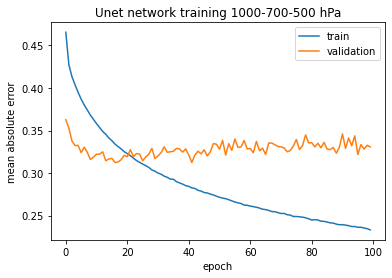

In [12]:
print("~ Unet Dataset 2017-2021 ~")
print(f"val_loss: {history['val_loss'][-1]}")
print(f"loss: {history['loss'][-1]}")
#print(history)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Unet network training 1000-700-500 hPa')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
model.save('/opt/datos/entrenamientos/gfs/04.h5')